# P-value Distribution By Power

In [1]:
import numpy as np
from scipy import stats
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt

In [2]:
sim_n = 100000     # 시뮬레이션 횟수
m = 106            # 샘플 평균
n = 26             # 샘플 수
sd = 15            # 샘플 표준편차

In [3]:
p = []
bars = 20

In [4]:
# 귀무가설: 샘플의 평균이 100이다.
# 대립가설: 샘플의 평균이 100이 아니다.
# N(m,sd)의 샘플 데이터를 100과 ttest를 sim_n번 만큼 반복하여 p-value를 p=[]에 저장
for i in range(sim_n):
    x = np.random.normal(m,sd,n)
    z = stats.ttest_1samp(x, 100)[1]
    p.append(z)

In [5]:
# 파워 계산
# alpha = 0.05
power = smp.TTestPower.power(smp.TTestPower.power, effect_size=((m-100)/sd), nobs=n, alpha=0.05, alternative='two-sided')
power

0.500464570207731

(0.0, 100000.0)

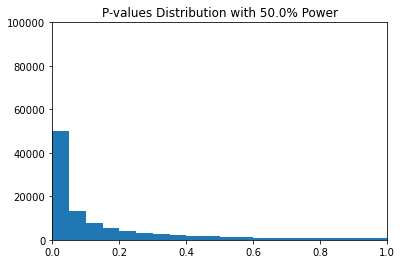

In [6]:
# plotting
plt.hist(p, bins=bars )
plt.title('P-values Distribution with {0}% Power'.format(round(power,3)*100))
plt.xlim(0,1)
plt.ylim(0,sim_n)

50% 파워를 가지는 테스트에서 0.05 이하의 값을 가지는 p-value가 약 50%(약 50000번/시뮬레이션횟수(100000번)) 측정되었다.   


In [7]:
sim_n2 = 100000     # 시뮬레이션 횟수
m2 = 108            # 샘플 평균
n2 = 51             # 샘플 수
sd2 = 15            # 샘플 표준편차

In [8]:
p2 = []
bars2 = 20

In [9]:
for i in range(sim_n2):
    x = np.random.normal(m2,sd2,n2)
    z = stats.ttest_1samp(x, 100)[1]
    p2.append(z)

In [11]:
power2 = smp.TTestPower.power(smp.TTestPower.power, effect_size=((m2-100)/sd2), nobs=n2, alpha=0.05, alternative='two-sided')
power2

0.9620240135874724

(0.0, 100000.0)

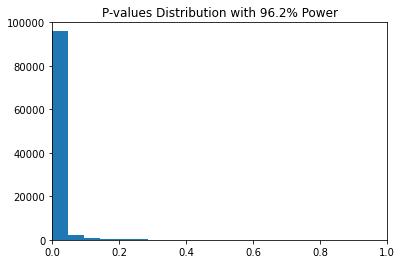

In [12]:
plt.hist(p2, bins=bars )
plt.title('P-values Distribution with {0}% Power'.format(round(power2,3)*100))
plt.xlim(0,1)
plt.ylim(0,sim_n2)